In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Pre-processing methods for the dataset

def get_array_of_matrix(dataset):
    array_of_images = []
    for row in dataset:
        row = np.asarray(row)
        matrix = np.reshape(row, (48, 48))
        array_of_images.append(matrix)
    return array_of_images


def crop_dataset(dataset, row, clmn):
    copped_dataset = []
    for image in dataset:
        y, x = image.shape
        first_x = x//2-(row//2)
        first_y = y//2-(clmn//2)
        copped_dataset.append(image[first_y:first_y + clmn, first_x:first_x + row])
    return copped_dataset


def reshape_dataset(dataset):
    reshaped_dataset = []
    for image in dataset:
        image = cv.resize(image, (48, 48)) # un po' bruttino
        image = image.flatten()
        reshaped_dataset.append(image)
    # reshaped_dataset = np.reshape(reshaped_dataset, (12660, 2304)) # un po' bruttino
    return reshaped_dataset


def apply_adaptive_threshold(dataset):
    dataset_with_filter = []
    for image in dataset:
        image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
        image = image.flatten()
        dataset_with_filter.append(image)
    dataset_with_filter = np.reshape(dataset_with_filter, (12660, 1600))
    return dataset_with_filter

In [3]:
x_train_gr_smpl = pd.read_csv("./datasets/x_train_gr_smpl.csv", delimiter=",", dtype=np.uint8)
y_train_smpl = pd.read_csv("./datasets/y_train_smpl.csv", delimiter=",", dtype=np.uint8)

In [4]:
dataset = np.asmatrix(x_train_gr_smpl)
aom_dataset = get_array_of_matrix(dataset)
cropped_dataset = crop_dataset(aom_dataset, 40, 40) # un po' bruttino
#new_dataset = reshape_dataset(cropped_dataset)
new_dataset = apply_adaptive_threshold(cropped_dataset)

In [5]:
# add y_train_smpl to new_dataset ---KARAN
dataset = np.append(new_dataset, y_train_smpl, axis=1)
x = dataset[:, 0:1599]
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

In [6]:
# code for Naive Bayes algorithm
# Gaussian
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.829583532790809


In [7]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.8128291048348492


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8025370990904739
 
Confusion matrix for MultiNom: 
[[217 156  57   0   1   0   0   1  15   0]
 [165 383  40   1   6   0   0   3   6   0]
 [ 20   7 109   0   2   0   0   0   2   0]
 [  2  47   0 394   6   0   0   0   5   0]
 [  6  88   0   0 572   4   0   6  11   2]
 [ 11  19   0   1  18 687   0   0   5   0]
 [  1   8   7   0   0   1 204   0  17   1]
 [  5   5   0   0   0   0   0  73   1   0]
 [  7  20  18   0   9   4   0   1 644   1]
 [  1   0   3   0   2   0   0   0   0  70]]


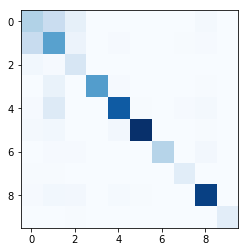

 
Classification report for MultiNom: 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       447
           1       0.52      0.63      0.57       604
           2       0.47      0.78      0.58       140
           3       0.99      0.87      0.93       454
           4       0.93      0.83      0.88       689
           5       0.99      0.93      0.96       741
           6       1.00      0.85      0.92       239
           7       0.87      0.87      0.87        84
           8       0.91      0.91      0.91       704
           9       0.95      0.92      0.93        76

   micro avg       0.80      0.80      0.80      4178
   macro avg       0.81      0.81      0.80      4178
weighted avg       0.83      0.80      0.81      4178



In [8]:
MultiNom = MultinomialNB()
MultiNom.fit(X_train, y_train)
print(MultiNom)
y_expect = y_test
y_pred = MultiNom.predict(X_test)
print(accuracy_score(y_expect, y_pred))
print(" ")
print("Confusion matrix for MultiNom: ")
print(confusion_matrix(y_expect, y_pred))
plt.imshow(confusion_matrix(y_expect, y_pred), cmap="Blues")
plt.show()
print(" ")
print("Classification report for MultiNom: ")
print(classification_report(y_expect, y_pred, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


In [9]:
correlation_dict={0:[863,903,823,817,783,943,1179,581,541,1180],\
                  1:[818,659,699,1179,1180,541,1182,581,1181,1183],\
                  2:[1135,863,548,1134,823,1136,903,1192,1175,547],\
                  3:[821,861,862,781,822,902,901,1102,1101,820],\
                  4:[1142,946,906,1141,542,541,582,907,1382,1102],\
                  5:[980,1020,940,979,664,939,665,981,899,1019],\
                  6:[1148,1187,1185,1186,1149,1184,506,1142,505,1183],\
                  7:[814,821,862,822,861,774,813,773,815,781],\
                  8:[869,621,829,1262,785,872,873,833,832,662],\
                  9:[906,946,699,504,698,464,465,866,945,738]}

In [10]:
top_2_cols = [values[:2] for values in correlation_dict.values()]
top_2_cols = sorted(set([y for x in top_2_cols for y in x])) # Flatten & remove duplicates
top_5_cols = [values[:5] for values in correlation_dict.values()]
top_5_cols = sorted(set([y for x in top_5_cols for y in x])) # # Flatten & remove duplicates
top_10_cols = [values[::] for values in correlation_dict.values()]
top_10_cols = sorted(set([y for x in top_10_cols for y in x])) # # Flatten & remove duplicates

In [11]:
# Create a pandas dataframe  
dataframe = pd.DataFrame(data=dataset, index=None,columns=None,dtype=np.uint8, copy=False)

## Top 2 

In [12]:
top_2_df = dataframe.iloc[:,top_2_cols]

In [13]:
x = top_2_df
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

In [14]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.7108664432742939


In [15]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.7252273815222594


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.6775969363331737
 
Confusion matrix for MultiNom: 
[[240  69  36   9  12  38   6  27   9   1]
 [127 247  53  27  18  28   6  42  50   6]
 [ 11   8  60   3   0   3   6  40   8   1]
 [ 13  19   4 392  11   2   1   8   3   1]
 [ 32  19   4   8 379  74   4  22  52  95]
 [  8  15   6   0  47 654   4   3   3   1]
 [  3   2   3   7   4   6 191   0  19   4]
 [  1   4   5   0   0   1   0  71   2   0]
 [ 26  23  14   6  30  37  23   6 529  10]
 [  0   1   0   0   1   3   0   0   3  68]]


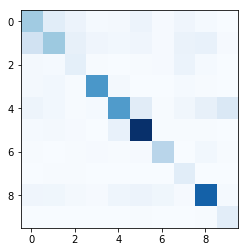

 
Classification report for MultiNom: 
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       447
           1       0.61      0.41      0.49       604
           2       0.32      0.43      0.37       140
           3       0.87      0.86      0.87       454
           4       0.75      0.55      0.64       689
           5       0.77      0.88      0.82       741
           6       0.79      0.80      0.80       239
           7       0.32      0.85      0.47        84
           8       0.78      0.75      0.77       704
           9       0.36      0.89      0.52        76

   micro avg       0.68      0.68      0.68      4178
   macro avg       0.61      0.70      0.63      4178
weighted avg       0.70      0.68      0.68      4178



In [16]:
MultiNom = MultinomialNB()
MultiNom.fit(X_train, y_train)
print(MultiNom)
y_expect = y_test
y_pred = MultiNom.predict(X_test)
print(accuracy_score(y_expect, y_pred))
print(" ")
print("Confusion matrix for MultiNom: ")
print(confusion_matrix(y_expect, y_pred))
plt.imshow(confusion_matrix(y_expect, y_pred), cmap="Blues")
plt.show()
print(" ")
print("Classification report for MultiNom: ")
print(classification_report(y_expect, y_pred, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Top 5

In [17]:
top_5_df = dataframe.iloc[:,top_5_cols]

In [18]:
x = top_5_df
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

In [19]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8118717089516515


In [20]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.8192915270464337


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.7817137386309239
 
Confusion matrix for MultiNom: 
[[317  68  15   7   2  19   1   8   9   1]
 [118 356  33  10  16  30   2  17  21   1]
 [ 12   9  78   0   2   1   0  35   3   0]
 [ 23  15   0 381  25   1   0   3   5   1]
 [ 24  41   9   3 511  32   0  22  41   6]
 [  1   7   0   1  16 710   0   1   5   0]
 [  1   0   0   1   2  14 211   0   7   3]
 [  1   8   4   0   0   1   0  70   0   0]
 [ 23  31  10   0  25  31  17   4 561   2]
 [  0   1   0   0   2   2   0   0   0  71]]


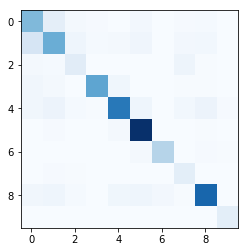

 
Classification report for MultiNom: 
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       447
           1       0.66      0.59      0.62       604
           2       0.52      0.56      0.54       140
           3       0.95      0.84      0.89       454
           4       0.85      0.74      0.79       689
           5       0.84      0.96      0.90       741
           6       0.91      0.88      0.90       239
           7       0.44      0.83      0.57        84
           8       0.86      0.80      0.83       704
           9       0.84      0.93      0.88        76

   micro avg       0.78      0.78      0.78      4178
   macro avg       0.75      0.78      0.76      4178
weighted avg       0.79      0.78      0.78      4178



In [21]:
MultiNom = MultinomialNB()
MultiNom.fit(X_train, y_train)
print(MultiNom)
y_expect = y_test
y_pred = MultiNom.predict(X_test)
print(accuracy_score(y_expect, y_pred))
print(" ")
print("Confusion matrix for MultiNom: ")
print(confusion_matrix(y_expect, y_pred))
plt.imshow(confusion_matrix(y_expect, y_pred), cmap="Blues")
plt.show()
print(" ")
print("Classification report for MultiNom: ")
print(classification_report(y_expect, y_pred, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [22]:
top_10_df = dataframe.iloc[:,top_10_cols]

In [23]:
x = top_10_df
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

In [24]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8475347056007659


In [25]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.8549545236955481


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8123504068932503
 
Confusion matrix for MultiNom: 
[[316  85  23   0   2  13   0   2   5   1]
 [139 371  38   4   8  24   0   6  13   1]
 [  4   7  92   0   1   1   0  32   3   0]
 [ 16  13   0 397  18   1   0   2   7   0]
 [ 24  51   8   1 552  24   0  17  10   2]
 [  1   8   0   1  10 714   0   1   6   0]
 [  0   0   0   2   3  10 217   0   6   1]
 [  0   9   2   0   0   0   0  73   0   0]
 [ 10  33   3   1  18  37   9   2 590   1]
 [  1   0   0   0   2   1   0   0   0  72]]


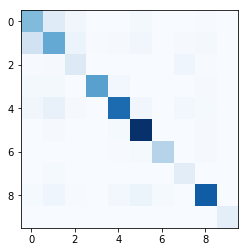

 
Classification report for MultiNom: 
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       447
           1       0.64      0.61      0.63       604
           2       0.55      0.66      0.60       140
           3       0.98      0.87      0.92       454
           4       0.90      0.80      0.85       689
           5       0.87      0.96      0.91       741
           6       0.96      0.91      0.93       239
           7       0.54      0.87      0.67        84
           8       0.92      0.84      0.88       704
           9       0.92      0.95      0.94        76

   micro avg       0.81      0.81      0.81      4178
   macro avg       0.79      0.82      0.80      4178
weighted avg       0.82      0.81      0.82      4178



In [26]:
MultiNom = MultinomialNB()
MultiNom.fit(X_train, y_train)
print(MultiNom)
y_expect = y_test
y_pred = MultiNom.predict(X_test)
print(accuracy_score(y_expect, y_pred))
print(" ")
print("Confusion matrix for MultiNom: ")
print(confusion_matrix(y_expect, y_pred))
plt.imshow(confusion_matrix(y_expect, y_pred), cmap="Blues")
plt.show()
print(" ")
print("Classification report for MultiNom: ")
print(classification_report(y_expect, y_pred, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


# Clustering

Source: udemy.com

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
dataframe.rename(columns ={1600:"Label"}, inplace =True) #Renaming the last column as "Label"
scaler.fit(dataframe.drop("Label", axis=1))# Fit the data to all columns except Labels
scaled_features = scaler.transform(dataframe.drop("Label", axis=1))
df_feat = pd.DataFrame(scaled_features,columns=dataframe.columns[:-1])

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
X = df_feat
y = dataframe["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [33]:
pred = knn.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[355  61   0   0   0   3   0   0   0   0]
 [ 80 479   0   0   0   4   0   0   1   0]
 [  1   2 125   0   0   1   0   2   0   0]
 [  9   1   0 393   1   1   0   0   0   0]
 [  5   1   0   0 622   1   0   0   1   0]
 [  2   0   0   0   0 675   0   0   0   0]
 [  1   1   1   0   0   0 233   0   1   0]
 [  6   4   1   0   0   0   0  53   0   0]
 [ 18   4   0   0   0   4   0   0 545   0]
 [  1   0   0   0   0   0   0   0   0  99]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       419
           1       0.87      0.85      0.86       564
           2       0.98      0.95      0.97       131
           3       1.00      0.97      0.98       405
           4       1.00      0.99      0.99       630
           5       0.98      1.00      0.99       677
           6       1.00      0.98      0.99       237
           7       0.96      0.83      0.89        64
           8       0.99      0.95      0.97       571
           9       1.00     

In [35]:
knn2 = KNeighborsClassifier(n_neighbors=1)# Only 1 cluster
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[359  58   0   0   0   2   0   0   0   0]
 [ 60 502   0   1   0   1   0   0   0   0]
 [  2   1 127   0   0   1   0   0   0   0]
 [  6   0   0 397   1   0   0   0   1   0]
 [  0   0   0   0 627   2   1   0   0   0]
 [  1   0   0   0   0 676   0   0   0   0]
 [  0   0   1   0   0   0 236   0   0   0]
 [  2   0   0   0   0   0   0  62   0   0]
 [  9   3   0   0   0   0   0   0 559   0]
 [  0   1   0   0   0   0   0   0   0  99]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       419
           1       0.89      0.89      0.89       564
           2       0.99      0.97      0.98       131
           3       1.00      0.98      0.99       405
           4       1.00      1.00      1.00       630
           5       0.99      1.00      0.99       677
           6       1.00      1.00      1.00       237
           7       1.00      0.97      0.98        64
           8       1.00      0.98      0.99       571
           9       1.00     

#### Varying the clusters

In [36]:
# error_rate =[]

# for i in range(1,20):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test)) #Average predictions not equal to test values

In [37]:
# plt.figure(figsize=(4,4))
# plt.plot(range(1,20),error_rate,color="blue",linestyle='dashed',marker="o",markerfacecolor="red",markersize=10)
# plt.title("Error rate vs K-Value")
# plt.xlabel("K")
# plt.ylabel("Error Rate")

In [38]:
from sklearn.manifold import TSNE

In [50]:
x_train_emb3 = TSNE(n_components=3, perplexity=35).fit_transform(X_train)

In [51]:
print(x_train_emb3.shape)

(8862, 3)


In [48]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


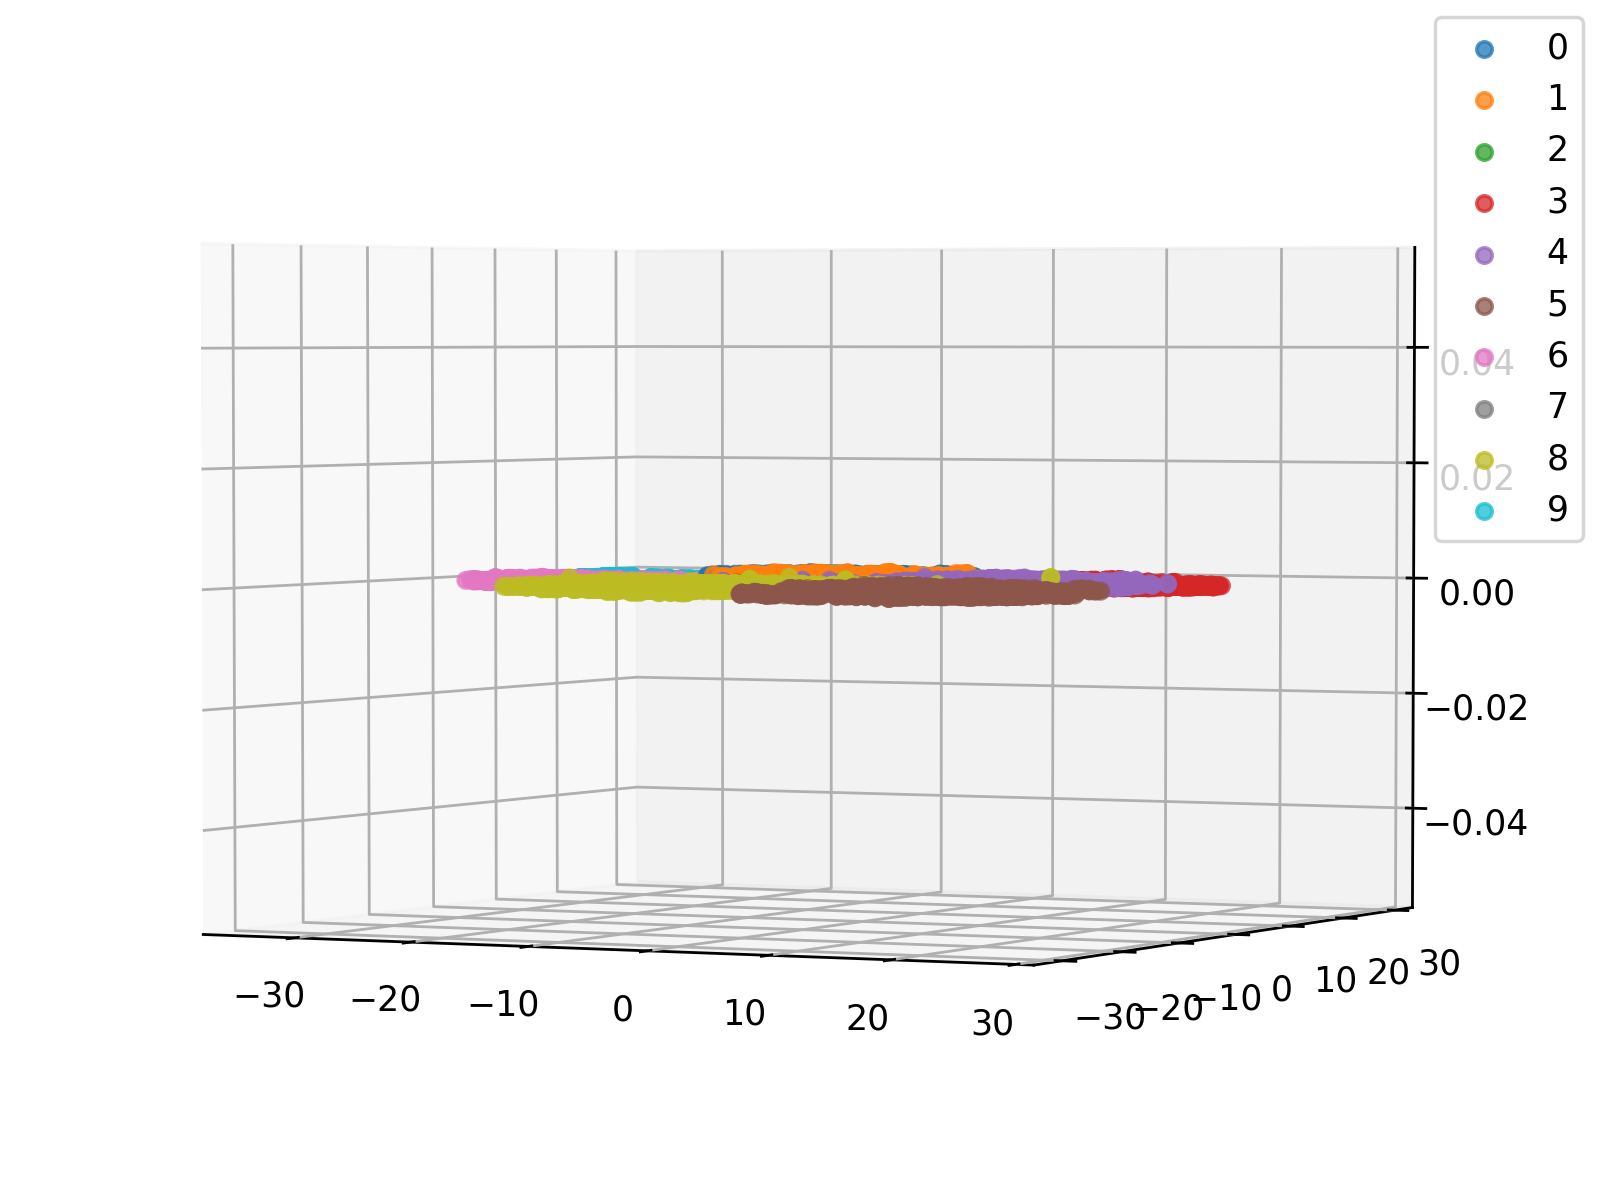

In [52]:
fig = plt.figure()
ax = Axes3D(fig)
for label in range(10):
    x_train_tmp = x_train_emb3[y_train==label]
    ax.scatter(x_train_tmp[:,0],x_train_tmp[:,1],alpha=0.75, label=label)
ax.legend()
plt.show()